Finish training and validate on test data (print confusion matrix and report)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tqdm

In [3]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
import keras
from torch.utils.data import DataLoader,Dataset
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import load

In [4]:
import torch.nn as nn
import torch.nn.functional as F  # Functional

In [5]:
#dataset is available https://drive.google.com/drive/folders/1WJemKpDspMnvEU_4oyxkxAxgvVihuKr5?usp=sharing
#you can

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/'

In [7]:
import os

In [8]:
directory = '/content/drive/MyDrive/NA_Fish_Dataset-20250210T052557Z-001/NA_Fish_Dataset'
clases = os.listdir(directory)

In [9]:
clases

['Red Sea Bream',
 'Trout',
 'Gilt Head Bream',
 'Shrimp',
 'Black Sea Sprat',
 'Striped Red Mullet',
 'Red Mullet',
 'Sea Bass',
 'Horse Mackerel']

In [10]:
clases = clases[:3]

In [11]:
clases

['Red Sea Bream', 'Trout', 'Gilt Head Bream']

In [15]:
directory = '/content/drive/MyDrive/NA_Fish_Dataset-20250210T052557Z-001/NA_Fish_Dataset'
train_files = []
target_files = []
for fish_type in clases:
    for file in os.listdir(os.path.join(directory, fish_type)):
        train_files.append(os.path.join(directory, fish_type, file))
        target_files.append(fish_type)

In [16]:
df = pd.DataFrame({'img' : train_files, 'target' : target_files})
df.head()

,img,target
0,/content/drive/MyDrive/NA_Fish_Dataset-2025021...,Red Sea Bream
1,/content/drive/MyDrive/NA_Fish_Dataset-2025021...,Red Sea Bream
2,/content/drive/MyDrive/NA_Fish_Dataset-2025021...,Red Sea Bream
3,/content/drive/MyDrive/NA_Fish_Dataset-2025021...,Red Sea Bream
4,/content/drive/MyDrive/NA_Fish_Dataset-2025021...,Red Sea Bream


In [17]:
len(df)

132

In [18]:
img = []
for ind in tqdm.tqdm(range(len(df['img']))):
    origImage = cv2.imread(df['img'][ind])
    origImage = cv2.resize(origImage, (256, 256))
    img.append(origImage)
df['img'] = img

100%|██████████| 132/132 [01:27<00:00,  1.51it/s]


In [19]:
torch.cuda.is_available()

True

In [20]:
df.head()

,img,target
0,"[[[135, 105, 55], [140, 104, 65], [133, 104, 5...",Red Sea Bream
1,"[[[111, 92, 48], [111, 85, 49], [115, 83, 47],...",Red Sea Bream
2,"[[[117, 79, 38], [119, 77, 32], [130, 89, 44],...",Red Sea Bream
3,"[[[125, 102, 57], [121, 92, 55], [129, 106, 71...",Red Sea Bream
4,"[[[121, 90, 36], [119, 88, 37], [130, 89, 43],...",Red Sea Bream


In [21]:
df['target'].unique()

array(['Red Sea Bream', 'Trout', 'Gilt Head Bream'], dtype=object)

In [22]:
y = []
for i in range(len(df['target'])):
    for j in range(len(clases)):
        if df['target'][i] == clases[j]:
            y.append(j)

In [23]:
df.head()

,img,target
0,"[[[135, 105, 55], [140, 104, 65], [133, 104, 5...",Red Sea Bream
1,"[[[111, 92, 48], [111, 85, 49], [115, 83, 47],...",Red Sea Bream
2,"[[[117, 79, 38], [119, 77, 32], [130, 89, 44],...",Red Sea Bream
3,"[[[125, 102, 57], [121, 92, 55], [129, 106, 71...",Red Sea Bream
4,"[[[121, 90, 36], [119, 88, 37], [130, 89, 43],...",Red Sea Bream


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img, y, test_size=0.2, random_state=10)

In [25]:
len(y_train)

105

In [26]:
len(y_test)

27

In [27]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
from torch.utils.data import DataLoader,Dataset
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
class MyDataset(Dataset):
    def __init__(self, data, targets,transform=None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        if self.transform:
            x = Image.fromarray(self.data[index].astype(np.uint8))
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)
%matplotlib inline
transform = transforms.Compose([transforms.ToTensor()])
dataset = MyDataset(X_train,y_train, transform=transform)
trainloader = DataLoader(dataset, batch_size=4)

testset = MyDataset(X_test,y_test, transform=transform)
testloader = DataLoader(testset, batch_size=4)

In [ ]:
class MyConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(MyConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels= #your code, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(#your code, 120)  # !!!
        self.fc2 = nn.Linear(#your code, 84)
        self.fc3 = nn.Linear(84, #your code)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, #your code)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyConvNet(nn.Module):
    def __init__(self):
        super(MyConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # Updated fc1: 16 channels * 61 * 61 features
        self.fc1 = nn.Linear(16 * 61 * 61, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Assuming 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten dynamically based on batch size
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [40]:
if torch.cuda.is_available():
  net = MyConvNet().cuda()
else:
  net = MyConvNet()

batch = []



batch = next(iter(trainloader))
print(batch[0].shape)

#net.forward(torch.FloatTensor(batch[0]))

torch.Size([4, 3, 256, 256])


In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [42]:

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
train_losses = []
test_losses = []
running_loss = 0
# итерируемся
for epoch in (range(10)):
    train_loss = []
    test_loss = []
    for i, batch in enumerate(trainloader):
        X_batch, y_batch = batch
        X_batch = X_batch.to(device=device, dtype=torch.float32)
        y_batch = y_batch.to(device = device, dtype = torch.long)
        optimizer.zero_grad()
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        net.train(False)

    with torch.no_grad():
        for i, batch in enumerate(testloader):
            X_test_batch, y_pred_batch = batch
            X_test_batch = X_test_batch.to(device=device, dtype=torch.float32)
            y_pred_batch = y_pred_batch.to(device = device, dtype = torch.long)
            y_test_pred = net(X_test_batch)
            test_l = loss_fn(y_test_pred, y_pred_batch)
            test_loss.append(test_l.item())
    train_losses.append(np.mean(train_loss))
    test_losses.append(np.mean(test_loss))
    print('epoch ',epoch, ' train_loss ',np.mean(np.mean(train_loss)), ' test_loss ',np.mean(test_loss))


epoch  0  train_loss  1.665616022215949  test_loss  1.288263542311532
epoch  1  train_loss  1.080653433446531  test_loss  1.0278512920652116
epoch  2  train_loss  0.8720125544954229  test_loss  1.0087446229798454
epoch  3  train_loss  0.7431113675788596  test_loss  0.9608216285705566
epoch  4  train_loss  0.6222202237005587  test_loss  0.8578135711806161
epoch  5  train_loss  0.5041622431189926  test_loss  0.7507733149187905
epoch  6  train_loss  0.40870424222063134  test_loss  0.6650126831872123
epoch  7  train_loss  0.3332077325494201  test_loss  0.6033505605799812
epoch  8  train_loss  0.2760023992094729  test_loss  0.5476123137133462
epoch  9  train_loss  0.23117613861406291  test_loss  0.5416087870086942


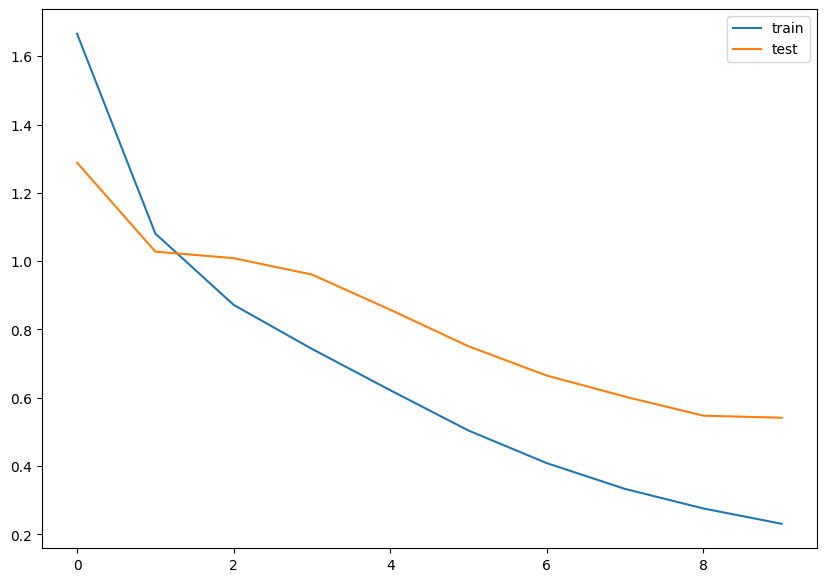

In [65]:
plt.figure(figsize=(10,7))
plt.plot(range(len(train_losses)), train_losses, label='train')
plt.plot(range(len(test_losses)), test_losses, label='test')
plt.legend()
plt.show()

In [66]:
y_pred = []
#Test your model on X_test data and show confusion_matrix and classification_report

In [67]:
y_true = []
y_pred = []

# Turn off gradients for validation/testing
with torch.no_grad():
    for X_batch, y_batch in testloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward pass
        outputs = net(X_batch)
        # Get predicted class
        _, preds = torch.max(outputs, 1)

        # Accumulate
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


In [68]:
y_pred[:5]

[2, 2, 2, 2, 2]

In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

[[8 0 4]
 [0 5 2]
 [0 0 8]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       1.00      0.71      0.83         7
           2       0.57      1.00      0.73         8

    accuracy                           0.78        27
   macro avg       0.86      0.79      0.79        27
weighted avg       0.87      0.78      0.79        27



In [70]:
#Add the block of code which will predict the value of one image

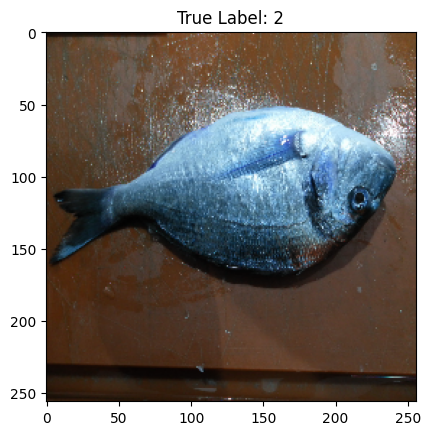

True Label: 2
Predicted Label: 2


In [73]:
# Example code to ADD in a new cell:
import matplotlib.pyplot as plt
import numpy as np

# Get a single batch from your testloader
dataiter = iter(testloader)
images, labels = next(dataiter)

# We'll work with just the first image in this batch
single_image = images[0].unsqueeze(0)  # shape: (1, C, H, W)
single_label = labels[0].item()

# Display the image (optional)
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.title(f"True Label: {single_label}")
plt.show()

# Put the model in evaluation mode and predict
net.eval()
with torch.no_grad():
    single_image = single_image.to(device)  # move the image to the correct device
    output = net(single_image)
    _, predicted = torch.max(output, 1)
    predicted_label = predicted.item()

print("True Label:", single_label)
print("Predicted Label:", predicted_label)
